In [1]:
import gensim
isReload = int(input("Type 1 to initiate reload of google word2vec: "))

if isReload:
    model_word2vec_temp = gensim.models.KeyedVectors.load_word2vec_format('/home/owner/デスクトップ/milnet+edu/GoogleNews-vectors-negative300.bin', binary=True)  
    model_word2vec = model_word2vec_temp

print('word2vec model loaded')


Type 1 to initiate reload of google word2vec: 


ValueError: invalid literal for int() with base 10: ''

In [1]:
import sys, os
sys.path.append(os.pardir)

os.environ["KERAS_BACKEND"]='tensorflow'
#import glob
import numpy as np


import keras
from keras.layers import Input, merge
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import Embedding
from keras.layers import LSTM
import keras.backend as K
from keras.layers import Lambda, regularizers, Average

from keras.models import Model
from keras.layers import Input, Conv2D, Conv1D, MaxPooling2D, GlobalMaxPooling2D, GlobalMaxPooling1D, MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import GRU
from keras.layers.wrappers import Bidirectional, TimeDistributed
from keras.layers.core import Dropout, Dense, Lambda, Masking
from keras.layers import merge, Layer, Activation, Dot, Concatenate, Flatten, Lambda

from keras.initializers import Identity,glorot_normal
from keras import regularizers
from keras import optimizers

from keras import metrics

from keras.utils import plot_model



/home/owner/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/owner/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
# x_test = np.load('/home/owner/デスクトップ/milnet+edu/data/Preprocessed/train_data_features.npy')#np.load('/home/owner/デスクトップ/PythonFile/imdb/t_train.npy')
# y_test = np.load('/home/owner/デスクトップ/milnet+edu/data/Preprocessed/train_data_scores_binary.npy')#np.load('/home/owner/デスクトップ/PythonFile/imdb/t_test.npy')
# print(x_test)
# print(x_test.shape)
#embWeights

In [3]:
x_train = np.load('/home/owner/デスクトップ/milnet+edu/data/Preprocessed/train_data_features.npy')#np.load('/home/owner/デスクトップ/PythonFile/imdb/x_train_sort.npy')
y_train = np.load('/home/owner/デスクトップ/milnet+edu/data/Preprocessed/train_data_scores_binary.npy')#np.load('/home/owner/デスクトップ/PythonFile/imdb/x_test_sort.npy')


x_test = np.load('/home/owner/デスクトップ/milnet+edu/data/Preprocessed/test_data_features.npy')#np.load('/home/owner/デスクトップ/PythonFile/imdb/t_train.npy')
y_test = np.load('/home/owner/デスクトップ/milnet+edu/data/Preprocessed/test_data_scores_binary.npy')#np.load('/home/owner/デスクトップ/PythonFile/imdb/t_test.npy')

x_valid = np.load('/home/owner/デスクトップ/milnet+edu/data/Preprocessed/validation_data_features.npy')
y_valid = np.load('/home/owner/デスクトップ/milnet+edu/data/Preprocessed/validation_data_scores_binary.npy')

train_idx = np.load('/home/owner/デスクトップ/milnet+edu/data/Preprocessed/train_data_idx_binary_only.npy')
test_idx = np.load('/home/owner/デスクトップ/milnet+edu/data/Preprocessed/test_data_idx_binary_only.npy')
valid_idx = np.load('/home/owner/デスクトップ/milnet+edu/data/Preprocessed/validation_data_idx_binary_only.npy')

#print(len(train_idx))
x_train = x_train[train_idx]
#y_train = y_train[train_idx]
#print(len(x_train))
#print(len(y_train))

x_test = x_test[test_idx]
#y_test = y_test[test_idx]

x_valid = x_valid[valid_idx]
#y_valid = y_valid[valid_idx]

print(len(x_valid))

word_idx=np.load( '/home/owner/デスクトップ/milnet+edu/data/Preprocessed/' + 'vocab_idx.npy')
#print(idx)
embWeights=np.load( '/home/owner/デスクトップ/milnet+edu/data/Preprocessed/' + 'weights.npy')#np.load('/home/owner/デスクトップ/PythonFile/imdb/weights.npy')

print(len(word_idx))
print(y_test)

print('data loaded')

25206
61560
[0 0 0 ... 1 1 1]
data loaded


In [4]:
features = x_valid
print(len(features))
for i in range(len(features)):
    #print(len(features[i]))
    if len(features[i])!=40:
            print('i:'+str(i)+'   ;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;')
            print(len(features[i]))
            x_valid[i].append(x_valid[i][-1])
    for j in range(len(features[i])):
        
        #print(len(features[i][j]))
        if len(features[i][j])!= 15:
            print('i:'+str(i)+'j:'+str(j)+'   ************************************************************')

25206
i:25205   ;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
39


In [5]:
x_valid=np.asarray(x_valid.tolist())

In [6]:
numSentencesPerDoc, numWordsPerSentence = x_train[0].shape[0], x_train[0].shape[1]
print(numSentencesPerDoc, numWordsPerSentence)
#print(x_train[0])

vocabSize, embeddingSize = embWeights.shape[0], embWeights.shape[1]
print(vocabSize, embeddingSize)

dropWordEmb = 0.25
recursiveClass = GRU

filters = 1 #embeddingSize*2
windowMin = 3
windowMax = 7
# dimOfSentimentMetrics z= 5
batch_size = 256
epochs = 25
numGRU = 100
numDensePool=20
eta = 1e-7
eta_dense = 1e-7
dr = 0.5

##

#wordsInputs = Input(shape=(numWordsPerSentence,1), batch_shape=(numSentencesPerDoc,numWordsPerSentence,), dtype='int32', name='words_input')

x_in = Input( shape = ( numSentencesPerDoc, numWordsPerSentence ) , name='Input' )
#x_pop = Lambda( lambda x: x, output_shape=(numWordsPerSentence, ) , name='convert_shape' )( x_in )
    
#Layer functionの定義
embLayer = Embedding( input_dim=embWeights.shape[0], output_dim=embWeights.shape[1], weights=[embWeights]
                      ,mask_zero=True , trainable=False #, embeddings_regularizer=regularizers.l2(1e-7)
                      , input_length=numWordsPerSentence, name='Embedding' )


#embLayer = model_word2vec.get_keras_embedding()

maxPooledPerDoc = []
convNets = []
maxPools = []

extraDimLayer = Lambda(lambda x: K.expand_dims(x), name='extraDimForConvo')
squeezeThirdLayer = Lambda(lambda x: K.squeeze(x, 3), name='squeezeThirdLayer')

for windowSize in range(windowMin,windowMax):
    name='word_mat_convo_win_size_'+str(windowSize)
    convNet = Conv2D(filters, kernel_size=(windowSize,embeddingSize), padding='valid', activation='relu'
                     ,strides=1, use_bias=True, input_shape=(numWordsPerSentence, embeddingSize, 1), data_format="channels_last",kernel_initializer=glorot_normal()
                     ,bias_regularizer=regularizers.l2(eta), kernel_regularizer=regularizers.l2(eta),name=name)
    convNets.append(convNet)
    name='word_mat_max_pool_win_size_'+str(windowSize)
    maxPool = MaxPooling1D(pool_size = int(numWordsPerSentence-windowSize-1), padding='valid')
    maxPools.append(maxPool)
    
    
for i in range(numSentencesPerDoc):
    maxPooledPerSentence = []
    x_pop = Lambda(lambda x: x[:,i], output_shape=(numWordsPerSentence, ) , name='convert_shape_'+'sentence'+str(i+1))( x_in )

    for j in range(windowMax-windowMin):   
        emb = embLayer(x_pop)
        emb = Dropout(dr,name='DropEmb'+str(i)+str(j))(emb)
        reshaped = extraDimLayer(emb)#Lambda(lambda x: K.expand_dims(x), name='extraDimForConvo_'+str(j)+'_sentence_'+str(i))(emb)
        name='word_mat_convo_win_size_'+str(j)+'_sentence_'+str(i)
        # wordsCNN = Conv2D(filters, kernel_size=(windowSize,embeddingSize), padding='valid', 
        #                    activation='relu', strides=1, use_bias=True, input_shape=(numWordsPerSentence, embeddingSize, 1), data_format="channels_last",
        #                    kernel_initializer=glorot_normal(),kernel_regularizer=regularizers.l2(),name=name)(reshaped)
        wordsCNN  = convNets[j](reshaped)
        #wordsCNN = Dropout(dr,name='DropCNN'+str(i)+str(j))(wordsCNN)
        squeezed = squeezeThirdLayer(wordsCNN)#Lambda(lambda x: K.squeeze(x, 3), name='squeezeThirdLayer_'+str(j)+'_sentence_'+str(i))(wordsCNN)
        #newShape = (-1, int(squeezed.shape[1])*int(squeezed.shape[2]))
        #squeezed = Lambda(lambda x: K.reshape(x,shape=newShape), name ='squeezeDimForMaxPool'+str(i)+str(j))(squeezed)
        wordsCNNPooled=GlobalMaxPooling1D()(squeezed)
        #wordsCNNPooled= MaxPooling1D(pool_size = int(squeezed.shape[1]), padding='valid')(squeezed)
        #wordsCNNPooled=maxPools[j](squeezed)
        maxPooledPerSentence.append(wordsCNNPooled)
        
    mergedPoolForSentence = Concatenate(axis = 1)(maxPooledPerSentence)
    newShape=(-1,1,int(mergedPoolForSentence.shape[1]))
    reshapedPoolForSentence = Lambda(lambda x: K.reshape(x,shape=newShape), name ='switch_axis_'+'sentence'+str(i+1)+'winSize'+str(j+windowMin))(mergedPoolForSentence)
    densePoolForSentence = Dense(numDensePool, bias_regularizer=regularizers.l2(eta),
                                 kernel_regularizer=regularizers.l2(eta), activation='softmax', use_bias=True)(reshapedPoolForSentence)

    densePoolForSentence = Dropout(dr,name='DropDense'+str(i))(densePoolForSentence)
    maxPooledPerDoc.append(densePoolForSentence)
    
#Naive Approach
averaged = Average()(maxPooledPerDoc) 
averaged = Lambda(lambda x:K.reshape(x,shape=(-1,int(averaged.shape[1])*int(averaged.shape[2]))), name ='attend_output')(averaged)
out_avg = Dense(1, activation='sigmoid', use_bias=True)(averaged) 
    
#Apply Attention 
mergedPoolPerDoc = Concatenate(axis = 1)(maxPooledPerDoc)
biRnn_ = Bidirectional(GRU(int(mergedPoolPerDoc.shape[2]),  return_sequences=True, bias_regularizer=regularizers.l2(eta)
                           ,kernel_regularizer=regularizers.l2(eta),recurrent_regularizer=regularizers.l2(eta)
                           ,dropout=dr, recurrent_dropout=dr, unroll=True), merge_mode='concat')(mergedPoolPerDoc)
newShape = (-1, int(mergedPoolPerDoc.shape[1]), 2*int(mergedPoolPerDoc.shape[2]))
biRnn = Lambda(lambda x: K.reshape(x,shape=newShape), name ='biRnn_TF_Reminder')(biRnn_)

CONTEXT_DIM = int(biRnn.shape[2])#int(int(biRnn.shape[1])*int(biRnn.shape[2])/2) 

eij = Dense(CONTEXT_DIM, kernel_regularizer=regularizers.l2(eta), bias_regularizer=regularizers.l2(eta)
            , use_bias=True, activation='tanh')(biRnn)
eij = Dense(CONTEXT_DIM, kernel_regularizer=regularizers.l2(eta), use_bias=False, activation='softmax')(eij)

weighted_input_ = merge([eij, biRnn], name='attention_mul', mode='mul')#Dot(axes = 2)([eij, biRnn])
weighted_input = Lambda(lambda x: K.reshape(x,shape=(-1,int(weighted_input_.shape[1])*int(weighted_input_.shape[2]))), name ='attend_output')(weighted_input_)

out = Dense(1, kernel_regularizer=regularizers.l2(eta_dense), bias_regularizer=regularizers.l2(eta_dense)
            , activation='sigmoid', use_bias=True)(weighted_input)




##

#モデルを保存せず直接可視化
#from IPython.display import SVG
#from keras.utils.vis_utils import model_to_dot
#SVG( model_to_dot( model ).create( prog='dot', format='svg' ) )
'''
##
print('Train...')
history = model.fit(x_train, y_train, batch_size = batch_size, verbose=1, epochs=epochs
                    ,validation_split=0.2, shuffle=True)
'''
                    
                    
                    

40 15
61560 300


/home/owner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:106: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
/home/owner/anaconda3/lib/python3.6/site-packages/keras/legacy/layers.py:464: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  name=name)


"\n##\nprint('Train...')\nhistory = model.fit(x_train, y_train, batch_size = batch_size, verbose=1, epochs=epochs\n                    ,validation_split=0.2, shuffle=True)\n"

In [9]:
weighted_input_

<tf.Tensor 'attention_mul/mul:0' shape=(?, 40, 20) dtype=float32>

In [7]:
model = Model(input=[x_in], output=[out])
adadelta = keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
model.compile(loss='binary_crossentropy',optimizer=adadelta, metrics=['accuracy'])
         
#model.compile(loss='binary_crossentropy',
#              optimizer=keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0),
#              metrics=['accuracy'])

print("Attention Model Build Complete")
##
# model_avg = Model(inputs=[x_in], outputs=[out_avg])
# model_avg.compile(loss='binary_crossentropy',
#               optimizer=keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0),
#               metrics=['accuracy'])

# print("Average Model Build Complete")
# ##
# #save model to png file
from keras.utils import plot_model
plot_model( model, to_file='model_0717.png' )

/home/owner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
  """Entry point for launching an IPython kernel.


Attention Model Build Complete


In [8]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input (InputLayer)              (None, 40, 15)       0                                            
__________________________________________________________________________________________________
convert_shape_sentence1 (Lambda (None, 15)           0           Input[0][0]                      
__________________________________________________________________________________________________
convert_shape_sentence2 (Lambda (None, 15)           0           Input[0][0]                      
__________________________________________________________________________________________________
convert_shape_sentence3 (Lambda (None, 15)           0           Input[0][0]                      
__________________________________________________________________________________________________
convert_sh

                                                                 word_mat_convo_win_size_4[38][0] 
                                                                 word_mat_convo_win_size_5[38][0] 
                                                                 word_mat_convo_win_size_6[38][0] 
                                                                 word_mat_convo_win_size_3[39][0] 
                                                                 word_mat_convo_win_size_4[39][0] 
                                                                 word_mat_convo_win_size_5[39][0] 
                                                                 word_mat_convo_win_size_6[39][0] 
__________________________________________________________________________________________________
global_max_pooling1d_1 (GlobalM (None, 1)            0           squeezeThirdLayer[0][0]          
__________________________________________________________________________________________________
global_max

In [12]:
len(y_test)

25510

In [8]:
save_model = keras.callbacks.ModelCheckpoint('./params_flex_emb.hdf5', monitor='val_loss', verbose=1
                                             , save_best_only=True, save_weights_only=True, mode='min', period=1)

In [9]:
history = model.fit(x_train, y_train, batch_size = batch_size, verbose=1, epochs=200 #epochs
                        ,validation_split=0.2, shuffle=True, callbacks=[save_model])#validation_data=(x_valid,y_valid)

Train on 168513 samples, validate on 42129 samples
Epoch 1/200
114176/168513 [===================>..........] - ETA: 58s - loss: 0.6463 - acc: 0.6651

KeyboardInterrupt: 

In [53]:
score=model.evaluate(x_test, y_test)
print(score[0],score[1]) # With Trainable EmbLayer

25510/25510 [==============================] - 50s 2ms/step
0.4051458334873724 0.8684437475499804


In [ ]:
score=model.evaluate(x_test, y_test)
print(score[0],score[1])

In [40]:
#modelのweightsだけロード
model.load_weights('./params.hdf5')

In [55]:
score=model.evaluate(x_test, y_test)
print(score[0],score[1])

25510/25510 [==============================] - 49s 2ms/step
0.30384962478136374 0.8760486083888671


In [ ]:
model = Model(input=[x_in], output=[out])
adadelta = keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
model.compile(loss='binary_crossentropy',
            optimizer=adadelta,
            metrics=['accuracy'])
         
# model.compile(loss='binary_crossentropy',
#               optimizer=keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0),
#               metrics=['accuracy'])

print("Attention Model Build Complete")

save_model = keras.callbacks.ModelCheckpoint('./params_flex_emb_adadelta.hdf5', monitor='val_loss', verbose=1
                                             , save_best_only=True, save_weights_only=True, mode='min', period=1)
##
# model_avg = Model(inputs=[x_in], outputs=[out_avg])
# model_avg.compile(loss='binary_crossentropy',
#               optimizer=keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0),
#               metrics=['accuracy'])

# print("Average Model Build Complete")
# ##
# #save model to png file
# from keras.utils import plot_model
# plot_model( model, to_file='model.png' )

In [ ]:
history2 = model.fit(x_train, y_train, batch_size = batch_size, verbose=1,  epochs=50 #epochs
                        ,validation_data=(x_valid,y_valid), shuffle=True, callbacks=[save_model])

In [ ]:
score=model.evaluate(x_test, y_test)
print(score[0],score[1])

In [ ]:
history3 = model.fit(x_train, y_train, batch_size = batch_size, verbose=1, initial_epochs = 300, epochs=500 #epochs
                        , validation_data=(x_valid,y_valid), shuffle=True, callbacks=[save_model])

In [51]:
#plot history
import matplotlib.pyplot as plt
def plot_history(history):
    # 精度の履歴をプロット
    plt.plot(history.history['acc'],label="accuracy")
    plt.plot(history.history['val_acc'],"o-",label="val_acc")
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(loc="lower right")
    plt.show()

    # 損失の履歴をプロット
    plt.plot(history.history['loss'],label="loss",)
    plt.plot(history.history['val_loss'],"o-",label="val_loss")
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc='lower right')
    plt.show()
    

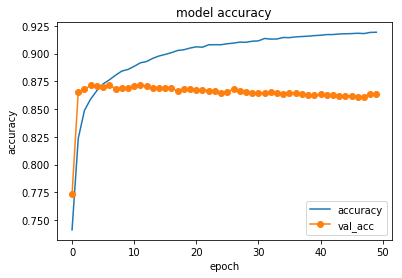

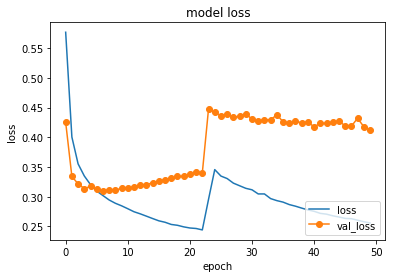

In [52]:
plot_history(history)

In [ ]:
#model_avg.save_weights('./params.hdf5')

In [ ]:
score=model.evaluate(x_test, y_test)

In [ ]:
print(score[0],score[1])

In [13]:
numSentencesPerDoc, numWordsPerSentence = x_train[0].shape[0], x_train[0].shape[1]
print(numSentencesPerDoc, numWordsPerSentence)
#print(x_train[0])

vocabSize, embeddingSize = embWeights.shape[0], embWeights.shape[1]
print(vocabSize, embeddingSize)

dropWordEmb = 0.25
recursiveClass = GRU

filters = 1 #embeddingSize*2
windowMin = 3
windowMax = 7
# dimOfSentimentMetrics z= 5
batch_size = 256
epochs = 25
numGRU = 100
numDensePool=50
eta = 1e-5
dr = 0.5

##

#wordsInputs = Input(shape=(numWordsPerSentence,1), batch_shape=(numSentencesPerDoc,numWordsPerSentence,), dtype='int32', name='words_input')

x_in = Input( shape = ( numSentencesPerDoc, numWordsPerSentence ) , name='Input' )
#x_pop = Lambda( lambda x: x, output_shape=(numWordsPerSentence, ) , name='convert_shape' )( x_in )
    
#Layer functionの定義
embLayer = Embedding( input_dim=embWeights.shape[0], output_dim=embWeights.shape[1], weights=[embWeights]
                      ,mask_zero=True , trainable=False, embeddings_regularizer=regularizers.l2(0.0000001)
                      , input_length=numWordsPerSentence, name='Embedding' )


#embLayer = model_word2vec.get_keras_embedding()

maxPooledPerDoc = []
convNets = []
maxPools = []

extraDimLayer = Lambda(lambda x: K.expand_dims(x), name='extraDimForConvo')
squeezeThirdLayer = Lambda(lambda x: K.squeeze(x, 3), name='squeezeThirdLayer')

for windowSize in range(windowMin,windowMax):
    name='word_mat_convo_win_size_'+str(windowSize)
    convNet = Conv2D(filters, kernel_size=(windowSize,embeddingSize), padding='valid', activation='relu'
                     ,strides=1, use_bias=True, input_shape=(numWordsPerSentence, embeddingSize, 1), data_format="channels_last",kernel_initializer=glorot_normal()
                     ,bias_regularizer=regularizers.l2(eta), kernel_regularizer=regularizers.l2(eta),name=name)
    convNets.append(convNet)
    name='word_mat_max_pool_win_size_'+str(windowSize)
    maxPool = MaxPooling1D(pool_size = int(numWordsPerSentence-windowSize-1), padding='valid')
    maxPools.append(maxPool)
    
    
for i in range(numSentencesPerDoc):
    maxPooledPerSentence = []
    x_pop = Lambda(lambda x: x[:,i], output_shape=(numWordsPerSentence, ) , name='convert_shape_'+'sentence'+str(i+1))( x_in )

    for j in range(windowMax-windowMin):   
        emb = embLayer(x_pop)
        emb = Dropout(dr,name='DropEmb'+str(i)+str(j))(emb)
        reshaped = extraDimLayer(emb)#Lambda(lambda x: K.expand_dims(x), name='extraDimForConvo_'+str(j)+'_sentence_'+str(i))(emb)
        name='word_mat_convo_win_size_'+str(j)+'_sentence_'+str(i)
        # wordsCNN = Conv2D(filters, kernel_size=(windowSize,embeddingSize), padding='valid', 
        #                    activation='relu', strides=1, use_bias=True, input_shape=(numWordsPerSentence, embeddingSize, 1), data_format="channels_last",
        #                    kernel_initializer=glorot_normal(),kernel_regularizer=regularizers.l2(),name=name)(reshaped)
        wordsCNN  = convNets[j](reshaped)
        wordsCNN = Dropout(dr,name='DropCNN'+str(i)+str(j))(wordsCNN)
        squeezed = squeezeThirdLayer(wordsCNN)#Lambda(lambda x: K.squeeze(x, 3), name='squeezeThirdLayer_'+str(j)+'_sentence_'+str(i))(wordsCNN)
        # newShape = (-1, int(squeezed.shape[1])*int(squeezed.shape[2]))
        # squeezed = Lambda(lambda x: K.reshape(x,shape=newShape), name ='squeezeDimForMaxPool'+str(i)+str(j))(squeezed)
        wordsCNNPooled=GlobalMaxPooling1D()(squeezed)
        #wordsCNNPooled= MaxPooling1D(pool_size = int(squeezed.shape[1]), padding='valid')(squeezed)
        maxPooledPerSentence.append(wordsCNNPooled)
        
    mergedPoolForSentence = Concatenate(axis = 1)(maxPooledPerSentence)
    newShape=(-1,1,int(mergedPoolForSentence.shape[1]))
    reshapedPoolForSentence = Lambda(lambda x: K.reshape(x,shape=newShape), name ='switch_axis_'+'sentence'+str(i+1)+'winSize'+str(j+windowMin))(mergedPoolForSentence)
    densePoolForSentence = Dense(numDensePool, bias_regularizer=regularizers.l2(eta),
                                 kernel_regularizer=regularizers.l2(eta), activation='softmax', use_bias=True)(reshapedPoolForSentence)

    densePoolForSentence = Dropout(dr,name='DropDense'+str(i))(densePoolForSentence)
    maxPooledPerDoc.append(densePoolForSentence)
    
#Naive Approach
averaged = Average()(maxPooledPerDoc) 
averaged = Lambda(lambda x:K.reshape(x,shape=(-1,int(averaged.shape[1])*int(averaged.shape[2]))), name ='attend_output')(averaged)
out_avg = Dense(1, activation='sigmoid', use_bias=True)(averaged) 
    
#Apply Attention 
mergedPoolPerDoc = Concatenate(axis = 1)(maxPooledPerDoc)
biRnn_ = Bidirectional(GRU(int(mergedPoolPerDoc.shape[2]),  return_sequences=True, bias_regularizer=regularizers.l2(eta)
                           ,kernel_regularizer=regularizers.l2(eta),recurrent_regularizer=regularizers.l2(eta)
                           ,dropout=dr, recurrent_dropout=dr, unroll=True), merge_mode='concat')(mergedPoolPerDoc)
newShape = (-1, int(mergedPoolPerDoc.shape[1]), 2*int(mergedPoolPerDoc.shape[2]))
biRnn = Lambda(lambda x: K.reshape(x,shape=newShape), name ='biRnn_TF_Reminder')(biRnn_)

CONTEXT_DIM = 100#int(int(biRnn.shape[1])*int(biRnn.shape[2])/2) 

eij = Dense(CONTEXT_DIM, kernel_regularizer=regularizers.l2(eta), bias_regularizer=regularizers.l2(eta)
            , use_bias=True, activation='tanh')(biRnn)
eij = Dense(CONTEXT_DIM, kernel_regularizer=regularizers.l2(eta), use_bias=False, activation='softmax')(eij)

weighted_input_ = Dot(axes = 1)([eij, biRnn])
weighted_input = Lambda(lambda x: K.reshape(x,shape=(-1,int(weighted_input_.shape[1])*int(weighted_input_.shape[2]))), name ='attend_output')(weighted_input_)

out = Dense(1, kernel_regularizer=regularizers.l2(eta), bias_regularizer=regularizers.l2(eta)
            , activation='sigmoid', use_bias=True)(weighted_input)




##

#モデルを保存せず直接可視化
#from IPython.display import SVG
#from keras.utils.vis_utils import model_to_dot
#SVG( model_to_dot( model ).create( prog='dot', format='svg' ) )
'''
##
print('Train...')
history = model.fit(x_train, y_train, batch_size = batch_size, verbose=1, epochs=epochs
                    ,validation_split=0.2, shuffle=True)
'''
model = Model(input=[x_in], output=[out])
adadelta = keras.optimizers.Adadelta(lr=0.5, rho=0.95, epsilon=None, decay=0.0)
# model.compile(loss='binary_crossentropy',
#              optimizer=adadelta,
#              metrics=['accuracy'])
         
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0),
              metrics=['accuracy'])

print("Attention Model Build Complete")
##

save_model = keras.callbacks.ModelCheckpoint('./params_fix_emb.hdf5', monitor='val_loss', verbose=1
                                             , save_best_only=True, save_weights_only=True, mode='min', period=1)
history2 = model.fit(x_train, y_train, batch_size = batch_size, verbose=1, epochs=20 #epochs
                        ,validation_data=(x_valid,y_valid), shuffle=True, callbacks=[save_model])

40 15
53831 300


/home/owner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:125: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`


Attention Model Build Complete
Train on 210642 samples, validate on 25206 samples
Epoch 1/20
210642/210642 [==============================] - 252s 1ms/step - loss: 0.6384 - acc: 0.7322 - val_loss: 0.6369 - val_acc: 0.7336

Epoch 00001: val_loss improved from inf to 0.63692, saving model to ./params_fix_emb.hdf5
Epoch 2/20
210642/210642 [==============================] - 236s 1ms/step - loss: 0.6315 - acc: 0.7322 - val_loss: 0.6251 - val_acc: 0.7336

Epoch 00002: val_loss improved from 0.63692 to 0.62514, saving model to ./params_fix_emb.hdf5
Epoch 3/20
210642/210642 [==============================] - 236s 1ms/step - loss: 0.6234 - acc: 0.7321 - val_loss: 0.6449 - val_acc: 0.7336

Epoch 00003: val_loss did not improve
Epoch 4/20
210642/210642 [==============================] - 235s 1ms/step - loss: 0.6184 - acc: 0.7320 - val_loss: 0.6481 - val_acc: 0.7336

Epoch 00004: val_loss did not improve
Epoch 5/20
210642/210642 [==============================] - 236s 1ms/step - loss: 0.6143 - acc